                budget  popularity   runtime  vote_average  vote_count  \
budget        1.000000    0.431744  0.229712     -0.035757    0.539997   
popularity    0.431744    1.000000  0.182388      0.288189    0.749005   
runtime       0.229712    0.182388  1.000000      0.386199    0.258101   
vote_average -0.035757    0.288189  0.386199      1.000000    0.380825   
vote_count    0.539997    0.749005  0.258101      0.380825    1.000000   
revenue       0.705306    0.602122  0.233236      0.188014    0.756143   

               revenue  
budget        0.705306  
popularity    0.602122  
runtime       0.233236  
vote_average  0.188014  
vote_count    0.756143  
revenue       1.000000  


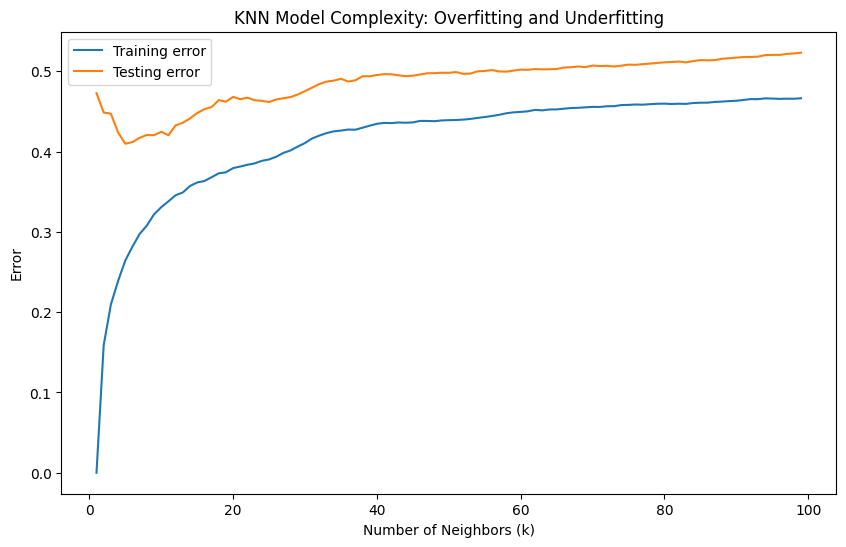

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

data = pd.read_csv("tmdb_5000_movies.csv")

# numeric_features = ['budget', 'popularity']
numeric_features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']
data = data[numeric_features]
data = data.replace(0, pd.NA)
data = data.dropna()
print(data.corr())

X = data.drop('revenue', axis=1)
y = data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 100)

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))  
    test_errors.append(1 - knn.score(X_test, y_test))     

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training error')
plt.plot(k_values, test_errors, label='Testing error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('KNN Model Complexity: Overfitting and Underfitting')
plt.legend()
plt.show()


              budget  vote_count   revenue
budget      1.000000    0.539997  0.705306
vote_count  0.539997    1.000000  0.756143
revenue     0.705306    0.756143  1.000000


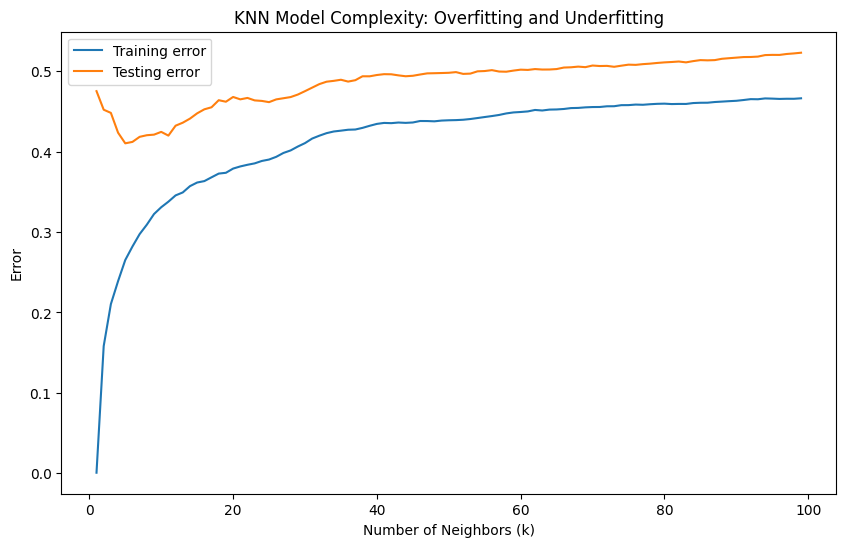

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

data = pd.read_csv("tmdb_5000_movies.csv")

numeric_features = ['budget', 'vote_count', 'revenue']
data = data[numeric_features]
data = data.replace(0, pd.NA)
data = data.dropna()
print(data.corr())
X = data.drop('revenue', axis=1)
y = data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 100)

train_errors2 = []
test_errors2 = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors2.append(1 - knn.score(X_train, y_train))  
    test_errors2.append(1 - knn.score(X_test, y_test))     

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors2, label='Training error')
plt.plot(k_values, test_errors2, label='Testing error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('KNN Model Complexity: Overfitting and Underfitting')
plt.legend()
plt.show()



In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import math

# Generate some random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

data = pd.read_csv("tmdb_5000_movies.csv")

numeric_features = ['budget', 'vote_count', 'revenue']
data = data[numeric_features]
data = data.replace(0, pd.NA)
data = data.replace(0.0, pd.NA)
data = data.dropna()
data = data[data['budget'] < 10e4]
data = data[data['revenue'] < 10e4]
# data["revenue"] = np.log(data["revenue"].astype('int64'))
# data["budget"] = np.log(data["budget"].astype('int64'))
# data = data[np.isfinite(data).all(1)]

print(data.corr())
X = data.drop('revenue', axis=1)
y = data['revenue']
# if np.any(np.isinf(X)) or np.any(np.abs(X) > 1e10) or np.any(np.isinf(y)) or np.any(np.abs(y) > 1e10):
#     raise ValueError("Input data contains infinity or values that are too large.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Linear Regression:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Fit a polynomial regression model with degree 10
k_values = range(2, 50, 2)
mse_train_values = []
mse_test_values = []

for x in k_values:
  poly_features = PolynomialFeatures(degree=k)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)

  model_poly = LinearRegression()
  model_poly.fit(X_train_poly, y_train)

  # Make predictions on the training and test sets
  y_train_pred_poly = model_poly.predict(X_train_poly)
  y_test_pred_poly = model_poly.predict(X_test_poly)

  # Calculate MSE for training and test sets
  train_mse_poly = mean_squared_error(y_train, y_train_pred_poly)
  test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
  mse_test_values.append(test_mse_poly)
  mse_train_values.append(train_mse_poly)

  print(f"\nPolynomial Regression (degree={k}):")
  print("Train MSE:", train_mse_poly)
  print("Test MSE:", test_mse_poly)


plt.plot(k, train_mse, label='Training MSE Error')
plt.plot(k, test_mse, label='Testing MSE Error')
plt.legend()
plt.show()

# Plot the results
# plt.figure(figsize=(10, 6))
# plt.scatter(X_train, y_train, color='blue', label='Training data')
# plt.scatter(X_test, y_test, color='red', label='Test data')
# plt.plot(X_train, y_train_pred, color='green', label='Linear Regression')
# plt.plot(X_test, y_test_pred, color='green', linestyle='dashed')
# plt.plot(X_train, y_train_pred_poly, color='orange', label='Polynomial Regression (degree=10)')
# plt.plot(X_test, y_test_pred_poly, color='orange', linestyle='dashed')
# plt.title('Linear vs Polynomial Regression')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.legend()
# plt.show()


              budget  vote_count   revenue
budget      1.000000   -0.173864  0.568993
vote_count -0.173864    1.000000 -0.004592
revenue     0.568993   -0.004592  1.000000
Linear Regression:
Train MSE: 1129.0411161691175
Test MSE: 6954836639.160072


c:\Python311\Lib\site-packages\sklearn\preprocessing\_polynomial.py:554: RuntimeWarning: overflow encountered in multiply
  np.multiply(
c:\Python311\Lib\site-packages\sklearn\preprocessing\_polynomial.py:554: RuntimeWarning: overflow encountered in multiply
  np.multiply(


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [78]:
print(len(X_train_poly), len(y_train))

len(X_train_poly[X_train_poly == np.inf])

2581 2581


6703905